<a href="https://colab.research.google.com/github/tatha04/Machine-Learning-Phase-Transitions/blob/main/Ising_model_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will generate data for the 2D Ising model using Monte-Carlo simulations. The lattice configurations will be used to train a neural network model to classify the two phases and to locate the phase transition.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import pickle

The 2D Ising model undergoes a phase transition from the high-T diordered state to a low-T magnetically ordered state at a critical temperature $T_c$.
In the thermodynamic limit (i.e. for large system size), the critical temperature $T_c \approx 2.3$.
However due to finite size effects the observed $T_c$ is usually higher.
We will use Monte-Carlo technique to simulate an Ising model and decrease the temperature gradually.
To generate training and test data, we will save lattice configuration for temperature values 0.5, 0.6, .., 4.9. (45 temp. values).
For each initial configuration, as we cool down the lattice, and at each temperature, save n_meas sample configurations.
This entire process is repeated for n_init_config times.
Thus, for n_init_config = 10 and n_meas = 10, we will generate
10 x 10 x 45 = 4500 lattice confurations (100 configurations at each temperature step).


In [ ]:
# Run Parameters
# L: Lattice size
# j_nn, j_nnn : nearest-neighbor, next-nearest-neighbor interactions
# h : applied uniform magnetic field 
# thi, tlo, tstep : Highest, Lowest, decrement temperature
# ntemp : No. of temperature steps
# Iterations : No. of MC steps for thermalization
# n_meas : No. of measurements of observables
# msteps : No. of MC steps before each measurement

L = 20;
j_nn = -1.0; j_nnn = 0.0; h = 0.0;
thi = 4.9; tlo = 0.5; tstep = 0.1; ntemp = int((thi-tlo)/tstep)+1;
Iterations = 10*L**3;
n_init_config = 10; n_meas = 10; mstep = 100;

# Initialization of Arrays for Lattice, Observables and temperatures

# Random Assignment of lattice
lattice = np.zeros((L,L),dtype=int);
lattice_save = np.zeros((n_init_config*n_meas*ntemp,L*L),dtype=int)
temp_save = np.zeros(n_init_config*n_meas*ntemp)

temperatures = np.linspace(thi,tlo,ntemp);

In [ ]:
step = 0
for config in range(n_init_config):
  lattice = random.randint(2,size=(L,L))
  lattice = 2*lattice-1
  # Cooling down the Lattice
  for temp in temperatures:
    
    #m = 0.0; chi = 0.0; # e = 0.0; cv = 0.0; sp_corr[:] = 0.0; sp_corr_nn = 0.0;
    
    for i in range(Iterations):
        
        # Perform a MC step
        
        # Choose a random site
        x=random.randint(L); y=random.randint(L);
        # nearest neighbors are (x,y1)(x,y2)(x1,y)(x2,y)
        x1,x2,y1,y2=(x-1)%L,(x+1)%L,(y-1)%L,(y+1)%L
        
        # Change in energy for a spin-flip
        de = 2*h*lattice[x,y]- 2*j_nn*lattice[x,y]*(lattice[x,y1]+lattice[x,y2]+lattice[x1,y]+lattice[x2,y])
        r = random.random();
        if (de < 0.0 or r < np.exp(-de/temp)): # Choose new configuration with probablity ~ exp(-beta dE)
            lattice[x,y] = -1 * lattice[x,y]   # Change the spin

    for i in range((n_meas-1)*mstep+1):
        # Perform a MC step
        
        # Choose a random site
        x=random.randint(L); y=random.randint(L);
        # nearest neighbors are (x,y1)(x,y2)(x1,y)(x2,y)
        x1,x2,y1,y2=(x-1)%L,(x+1)%L,(y-1)%L,(y+1)%L
        
        # Change in energy for a spin-flip
        de = 2*h*lattice[x,y]- 2*j_nn*lattice[x,y]*(lattice[x,y1]+lattice[x,y2]+lattice[x1,y]+lattice[x2,y])
        r = random.random();
        if (de<0.0 or r < np.exp(-de/temp)): # Choose new configuration with probablity ~ exp(-beta dE)
            lattice[x,y]=-1*lattice[x,y]     # Change the spin
        
        if (i%mstep == 0):
            lattice_save[step,:] = lattice.reshape((1,L*L))
            temp_save[step] = temp
            step += 1          
  print('Configuration: ',config)

df = pd.DataFrame(lattice_save)
df['Temp'] = temp_save
df.to_csv('/content/drive/MyDrive/Data Science/Data_Sets/Ising/Ising_data4.csv')

Configuration:  0
Configuration:  1
Configuration:  2
Configuration:  3
Configuration:  4
Configuration:  5
Configuration:  6
Configuration:  7
Configuration:  8
Configuration:  9


In [ ]:
temp_save.shape

(4500,)

In [ ]:
lattice_save

array([[-1, -1,  1, ..., -1, -1, -1],
       [ 1, -1,  1, ...,  1, -1, -1],
       [ 1,  1,  1, ...,  1, -1, -1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]])

In [ ]:
lattice_save.shape

(4500, 400)

<Figure size 864x1296 with 0 Axes>

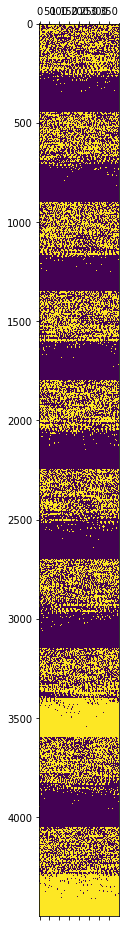

In [ ]:
plt.figure(figsize=(12,18))
plt.matshow(lattice_save)